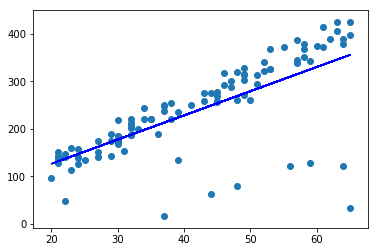

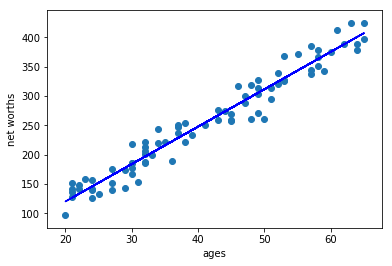

In [2]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(ages_train, net_worths_train)







try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



In [3]:
reg.coef_

array([[6.36859481]])

In [4]:
reg.score(ages_test,net_worths_test)

0.9831894553955322

In [6]:
predictions = reg.predict(ages_train)

In [7]:
predictions

array([[314.65206822],
       [314.65206822],
       [197.85966342],
       [350.19758273],
       [152.15828763],
       [294.34034565],
       [340.04172144],
       [233.40517793],
       [131.84656506],
       [294.34034565],
       [268.95069243],
       [147.08035699],
       [147.08035699],
       [177.54794085],
       [187.70380214],
       [253.7169005 ],
       [289.262415  ],
       [355.27551337],
       [131.84656506],
       [329.88586015],
       [243.56103921],
       [187.70380214],
       [177.54794085],
       [319.72999887],
       [223.24931664],
       [284.18448436],
       [177.54794085],
       [304.49620693],
       [253.7169005 ],
       [177.54794085],
       [208.01552471],
       [213.09345535],
       [142.00242634],
       [213.09345535],
       [147.08035699],
       [126.76863441],
       [187.70380214],
       [202.93759407],
       [253.7169005 ],
       [172.47001021],
       [350.19758273],
       [177.54794085],
       [263.87276179],
       [324

In [10]:
x = (predictions - net_worths_train).sort()

In [11]:
x

In [12]:
x

In [13]:
x = (predictions - net_worths_train)

In [14]:
x.sort()

In [16]:
sort(x)

NameError: name 'sort' is not defined

In [20]:
y = np.sort(x)

In [18]:
import numpy as np

In [21]:
y

array([[-2.34374503e+01],
       [-2.95637995e+01],
       [-4.59332097e+01],
       [-2.86481987e+01],
       [ 1.82744379e+01],
       [-3.22265869e+01],
       [-4.91992199e+01],
       [-1.68646751e+01],
       [-4.24268037e+00],
       [-7.39552180e+01],
       [-4.96749100e+01],
       [ 7.67556106e+00],
       [ 2.01002285e+01],
       [-7.63909350e+00],
       [ 6.06197228e-01],
       [-1.62873489e+01],
       [-5.05069166e+01],
       [ 3.21085239e+02],
       [-1.02546358e+01],
       [-4.43976191e+01],
       [-1.58743657e+01],
       [-3.34386424e+01],
       [ 8.30817205e-02],
       [-3.07572273e+01],
       [ 8.88356217e+01],
       [-2.98827765e+01],
       [-8.51185672e+00],
       [-6.63785936e+01],
       [-3.11622650e+00],
       [ 1.03045633e+01],
       [ 1.82763278e+01],
       [-3.46074429e+01],
       [-1.70962682e+01],
       [ 1.96585667e+02],
       [-1.04336034e+01],
       [ 3.00147084e+01],
       [-1.94384493e+01],
       [-1.80308577e+01],
       [-5.4

In [22]:
x = abs(x)

In [23]:
x

array([[2.34374503e+01],
       [2.95637995e+01],
       [4.59332097e+01],
       [2.86481987e+01],
       [1.82744379e+01],
       [3.22265869e+01],
       [4.91992199e+01],
       [1.68646751e+01],
       [4.24268037e+00],
       [7.39552180e+01],
       [4.96749100e+01],
       [7.67556106e+00],
       [2.01002285e+01],
       [7.63909350e+00],
       [6.06197228e-01],
       [1.62873489e+01],
       [5.05069166e+01],
       [3.21085239e+02],
       [1.02546358e+01],
       [4.43976191e+01],
       [1.58743657e+01],
       [3.34386424e+01],
       [8.30817205e-02],
       [3.07572273e+01],
       [8.88356217e+01],
       [2.98827765e+01],
       [8.51185672e+00],
       [6.63785936e+01],
       [3.11622650e+00],
       [1.03045633e+01],
       [1.82763278e+01],
       [3.46074429e+01],
       [1.70962682e+01],
       [1.96585667e+02],
       [1.04336034e+01],
       [3.00147084e+01],
       [1.94384493e+01],
       [1.80308577e+01],
       [5.40640002e+00],
       [2.94856151e+01],


In [24]:
np.sort(x)

array([[2.34374503e+01],
       [2.95637995e+01],
       [4.59332097e+01],
       [2.86481987e+01],
       [1.82744379e+01],
       [3.22265869e+01],
       [4.91992199e+01],
       [1.68646751e+01],
       [4.24268037e+00],
       [7.39552180e+01],
       [4.96749100e+01],
       [7.67556106e+00],
       [2.01002285e+01],
       [7.63909350e+00],
       [6.06197228e-01],
       [1.62873489e+01],
       [5.05069166e+01],
       [3.21085239e+02],
       [1.02546358e+01],
       [4.43976191e+01],
       [1.58743657e+01],
       [3.34386424e+01],
       [8.30817205e-02],
       [3.07572273e+01],
       [8.88356217e+01],
       [2.98827765e+01],
       [8.51185672e+00],
       [6.63785936e+01],
       [3.11622650e+00],
       [1.03045633e+01],
       [1.82763278e+01],
       [3.46074429e+01],
       [1.70962682e+01],
       [1.96585667e+02],
       [1.04336034e+01],
       [3.00147084e+01],
       [1.94384493e+01],
       [1.80308577e+01],
       [5.40640002e+00],
       [2.94856151e+01],


In [25]:
x = x.flatten()

In [26]:
x

array([2.34374503e+01, 2.95637995e+01, 4.59332097e+01, 2.86481987e+01,
       1.82744379e+01, 3.22265869e+01, 4.91992199e+01, 1.68646751e+01,
       4.24268037e+00, 7.39552180e+01, 4.96749100e+01, 7.67556106e+00,
       2.01002285e+01, 7.63909350e+00, 6.06197228e-01, 1.62873489e+01,
       5.05069166e+01, 3.21085239e+02, 1.02546358e+01, 4.43976191e+01,
       1.58743657e+01, 3.34386424e+01, 8.30817205e-02, 3.07572273e+01,
       8.88356217e+01, 2.98827765e+01, 8.51185672e+00, 6.63785936e+01,
       3.11622650e+00, 1.03045633e+01, 1.82763278e+01, 3.46074429e+01,
       1.70962682e+01, 1.96585667e+02, 1.04336034e+01, 3.00147084e+01,
       1.94384493e+01, 1.80308577e+01, 5.40640002e+00, 2.94856151e+01,
       3.89147628e+01, 4.04126563e+01, 3.61621849e+01, 1.73783495e+01,
       1.11111956e+01, 1.41314134e+01, 7.78704655e+01, 5.90205176e+01,
       4.69472730e+01, 1.08408530e+01, 1.03484994e+01, 1.95698342e+02,
       5.28413674e+01, 7.44619331e+00, 2.46382240e+01, 1.94740929e+01,
      

In [27]:
np.sort(x)

array([8.30817205e-02, 6.06197228e-01, 1.07834419e+00, 1.24224214e+00,
       2.27697972e+00, 3.11622650e+00, 3.15874195e+00, 3.36185108e+00,
       4.00286992e+00, 4.24268037e+00, 5.40640002e+00, 6.29313241e+00,
       7.44619331e+00, 7.63909350e+00, 7.67556106e+00, 8.14409491e+00,
       8.51185672e+00, 1.02546358e+01, 1.03045633e+01, 1.03484994e+01,
       1.04336034e+01, 1.06413832e+01, 1.08408530e+01, 1.11111956e+01,
       1.30611197e+01, 1.41314134e+01, 1.58743657e+01, 1.62873489e+01,
       1.68646751e+01, 1.70962682e+01, 1.73783495e+01, 1.80308577e+01,
       1.82744379e+01, 1.82763278e+01, 1.90014558e+01, 1.94384493e+01,
       1.94740929e+01, 2.01002285e+01, 2.18730571e+01, 2.20591126e+01,
       2.34374503e+01, 2.40433632e+01, 2.46382240e+01, 2.52499686e+01,
       2.60910856e+01, 2.85081974e+01, 2.86272498e+01, 2.86481987e+01,
       2.94856151e+01, 2.95637995e+01, 2.98827765e+01, 3.00147084e+01,
       3.07254068e+01, 3.07572273e+01, 3.12220590e+01, 3.17639830e+01,
      

In [28]:
x.size

90

In [32]:
res = x[::-1]

In [31]:
x = np.sort(x)

In [33]:
res

array([3.21085239e+02, 2.27495368e+02, 1.96585667e+02, 1.95698342e+02,
       1.88458114e+02, 1.88049356e+02, 1.84572802e+02, 8.92239745e+01,
       8.88356217e+01, 7.93910792e+01, 7.78704655e+01, 7.39552180e+01,
       7.09109072e+01, 6.92825290e+01, 6.63785936e+01, 5.90205176e+01,
       5.82630498e+01, 5.28413674e+01, 5.05069166e+01, 4.96749100e+01,
       4.91992199e+01, 4.69472730e+01, 4.59332097e+01, 4.43976191e+01,
       4.13910019e+01, 4.04126563e+01, 3.90937427e+01, 3.89147628e+01,
       3.76674472e+01, 3.61621849e+01, 3.57666641e+01, 3.46074429e+01,
       3.34386424e+01, 3.22265869e+01, 3.17639830e+01, 3.12220590e+01,
       3.07572273e+01, 3.07254068e+01, 3.00147084e+01, 2.98827765e+01,
       2.95637995e+01, 2.94856151e+01, 2.86481987e+01, 2.86272498e+01,
       2.85081974e+01, 2.60910856e+01, 2.52499686e+01, 2.46382240e+01,
       2.40433632e+01, 2.34374503e+01, 2.20591126e+01, 2.18730571e+01,
       2.01002285e+01, 1.94740929e+01, 1.94384493e+01, 1.90014558e+01,
      

In [40]:
newlist = res[9:]

In [41]:
newlist

array([79.39107925, 77.87046551, 73.95521804, 70.91090716, 69.28252898,
       66.37859364, 59.02051758, 58.26304975, 52.84136738, 50.5069166 ,
       49.67490995, 49.19921993, 46.94727303, 45.93320969, 44.39761907,
       41.39100187, 40.41265628, 39.09374272, 38.91476278, 37.66744719,
       36.16218486, 35.76666409, 34.60744289, 33.43864239, 32.22658686,
       31.76398298, 31.22205899, 30.75722734, 30.72540684, 30.01470844,
       29.8827765 , 29.56379953, 29.4856151 , 28.6481987 , 28.62724978,
       28.50819739, 26.09108565, 25.24996863, 24.63822403, 24.04336322,
       23.43745027, 22.05911264, 21.87305708, 20.10022854, 19.4740929 ,
       19.43844929, 19.0014558 , 18.27632782, 18.27443786, 18.03085773,
       17.37834951, 17.09626824, 16.86467506, 16.28734891, 15.87436572,
       14.13141339, 13.06111971, 11.11119564, 10.84085296, 10.64138316,
       10.43360338, 10.34849938, 10.30456326, 10.25463581,  8.51185672,
        8.14409491,  7.67556106,  7.6390935 ,  7.44619331,  6.29

In [42]:
newlist.size

81